## 4. Random Network Comparison
In this section, we will compare the collaboration network of the data scientists with a random network with the same number of nodes and edges. We will analyze the characteristics of the random network and compare them with the collaboration network of the data scientists. First, we will start by constructing the random network. We will use the Erdős-Rényi model to generate the random network. Thus, we will first compute the ege probability for the random network.

In [4]:
!pip install powerlaw
!pip install countryinfo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 9.1 MB/s eta 0:00:00


In [5]:
# Importing the libraries
import os  # Used for file operations
import requests  # Used for making HTTP requests
from bs4 import BeautifulSoup  # Used for parsing HTML
import re  # Used for regular expressions
import pandas as pd  # Used for data manipulation and analysis
import numpy as np  # Used for numerical computations
from tqdm import tqdm  # Used for progress bars
import time  # Used for time operations
import xml.etree.ElementTree as ET  # Used for parsing XML
import ipytree # Used for displaying the XML tag hierarchy in a dynamic tree-like structure
import json  # Used for JSON operations (used for the XML tag hierarchy)
import ast  # Used for converting string to list
import matplotlib.pyplot as plt  # Used for plotting graphs
import networkx as nx  # Used for creating and analyzing the network
import seaborn as sns  # Used for plotting graphs
from IPython.display import Image  # Used for displaying images in the notebook
import imageio.v2 as imageio  # Used for creating GIFs
import powerlaw  # Used for fitting power-law distributions
from countryinfo import CountryInfo  # Used for getting country information
import copy  # Used to copy nested dictionaries
import random  # Used for random operations
import plotly.graph_objects as go  # Used for creating interactive plots
import math  # Used for mathematical operations

In [6]:
# Read the CSV with the cleaned data for the data scientists
scientists_df = pd.read_csv('scientists_clean.csv')
# Print the number of unique PIDs
print(f'The number of unique PIDs is {scientists_df["pid"].nunique()}')

# Read the CSV with the cleaned data for the publications
papers_df = pd.read_csv('papers_clean.csv')

# Create a dictionary to hold the collaboration network
collaboration_network = {}
# Create a dictionary to hold the collaboration network with external authors
collaboration_network_external = {}

# Iterate over the rows of the DataFrame with the publications
for index, row in papers_df.iterrows():
    # Get the authors of the publication
    authors = ast.literal_eval(row['Authors'])
    external_authors = ast.literal_eval(row['External Authors'])
    # Get the year of the publication
    year = row['Year']
    # Iterate over the authors
    for author in authors:
        # If the author is not in the collaboration network, add him/her
        if author not in collaboration_network:
            collaboration_network[author] = {}
            collaboration_network_external[author] = {}
        # Iterate over the collaborators
        for collaborator in authors:
            # Don't count the author as a collaborator of himself/herself
            if collaborator != author:
                # If the collaborator is not in the author's collaborators, add him/her
                if collaborator not in collaboration_network[author]:
                    collaboration_network[author][collaborator] = {'year': year, 'collaborations': 1}
                else:
                    # If the collaborator is already in the author's collaborators, increment the count
                    collaboration_network[author][collaborator]['collaborations'] += 1
                    # If the year of the publication is earlier than the stored year, update the year
                    if year < collaboration_network[author][collaborator]['year']:
                        collaboration_network[author][collaborator]['year'] = year
        # Iterate over the external collaborators
        for external_collaborator in external_authors:
            # If the external collaborator is not in the author's collaborators, add him/her
            if external_collaborator not in collaboration_network_external[author]:
                collaboration_network_external[author][external_collaborator] = {'year': year, 'collaborations': 1}
            else:
                # If the external collaborator is already in the author's collaborators, increment the count
                collaboration_network_external[author][external_collaborator]['collaborations'] += 1
                # If the year of the publication is earlier than the stored year, update the year
                if year < collaboration_network_external[author][external_collaborator]['year']:
                    collaboration_network_external[author][external_collaborator]['year'] = year

# Save the collaboration network to a JSON file
with open('network.json', 'w') as file:
    json.dump(collaboration_network, file, indent=4)

# Save the collaboration network with external authors to a JSON file
with open('network_external.json', 'w') as file:
    json.dump(collaboration_network_external, file, indent=4)

# Display a preview of the JSON file (first several lines)
print('Preview of the JSON file:\n')
with open('network.json', 'r') as file:
    for _ in range(10):
        print(file.readline().strip())
    print('...')  # Skip some lines

The number of unique PIDs is 1052
Preview of the JSON file:

{
"33-1882": {
"m-DebapriyoMajumdar": {
"year": 2009,
"collaborations": 3
},
"90-2736": {
"year": 2019,
"collaborations": 4
},
...


### 4.1 Edge Probability
In this section, we will calculate the edge probability for the random network with the same number of nodes and edges as the collaboration network of the data scientists. The edge probability is an important parameter for generating the random network using the Erdős-Rényi model. We will calculate the edge probability p based on the following formula: p = L / (N * (N - 1) / 2), where L is the number of edges and N is the number of nodes in the network. The formula is derived from the fact that the total number of possible edges in an undirected graph with N nodes is N * (N - 1) / 2, and the edge probability p is the ratio of the number of edges L to the total number of possible edges.

In [11]:
# Load the collaboration network from the JSON file
with open('network.json', 'r') as file:
    collaboration_network = json.load(file)


# Define a function to generate the Graph from the collaboration network JSON file
def generate_graph(collaboration_network, weight_key='collaborations'):
    G = nx.Graph()
    # Add the links between the authors
    for author, collaborators in collaboration_network.items():
        for collaborator, details in collaborators.items():
            G.add_edge(author, collaborator, weight=details[weight_key])
    # Add the nodes that have no connections
    for author in collaboration_network.keys():
        if collaboration_network[author] == {}:
            G.add_node(author)
    return G


In [12]:
# Redefine the Graph for the collaboration network
G = generate_graph(collaboration_network)

# Calculate the number of nodes and links
N = G.number_of_nodes()
L = G.number_of_edges()

# Calculate the edge probability for the random network
p = L / (N * (N - 1) / 2)

# Display the number of nodes, links, and the edge probability
print(f'The number of nodes in the network is N={N}')
print(f'The number of links in the network is L={L}')
print(f'The edge probability for the random network is p={p:.4f}')

The number of nodes in the network is N=1052
The number of links in the network is L=9356
The edge probability for the random network is p=0.0169


### 4.2 Erdős-Rényi Random Network
We will get the random network by using the networkx graph generator, by having the number of nodes and edge probability calculated stated above as arguements. Once the random network is being created we can proceed to displaying it.

The Erdős-Rényi random network has 1052 nodes and 9269 edges.


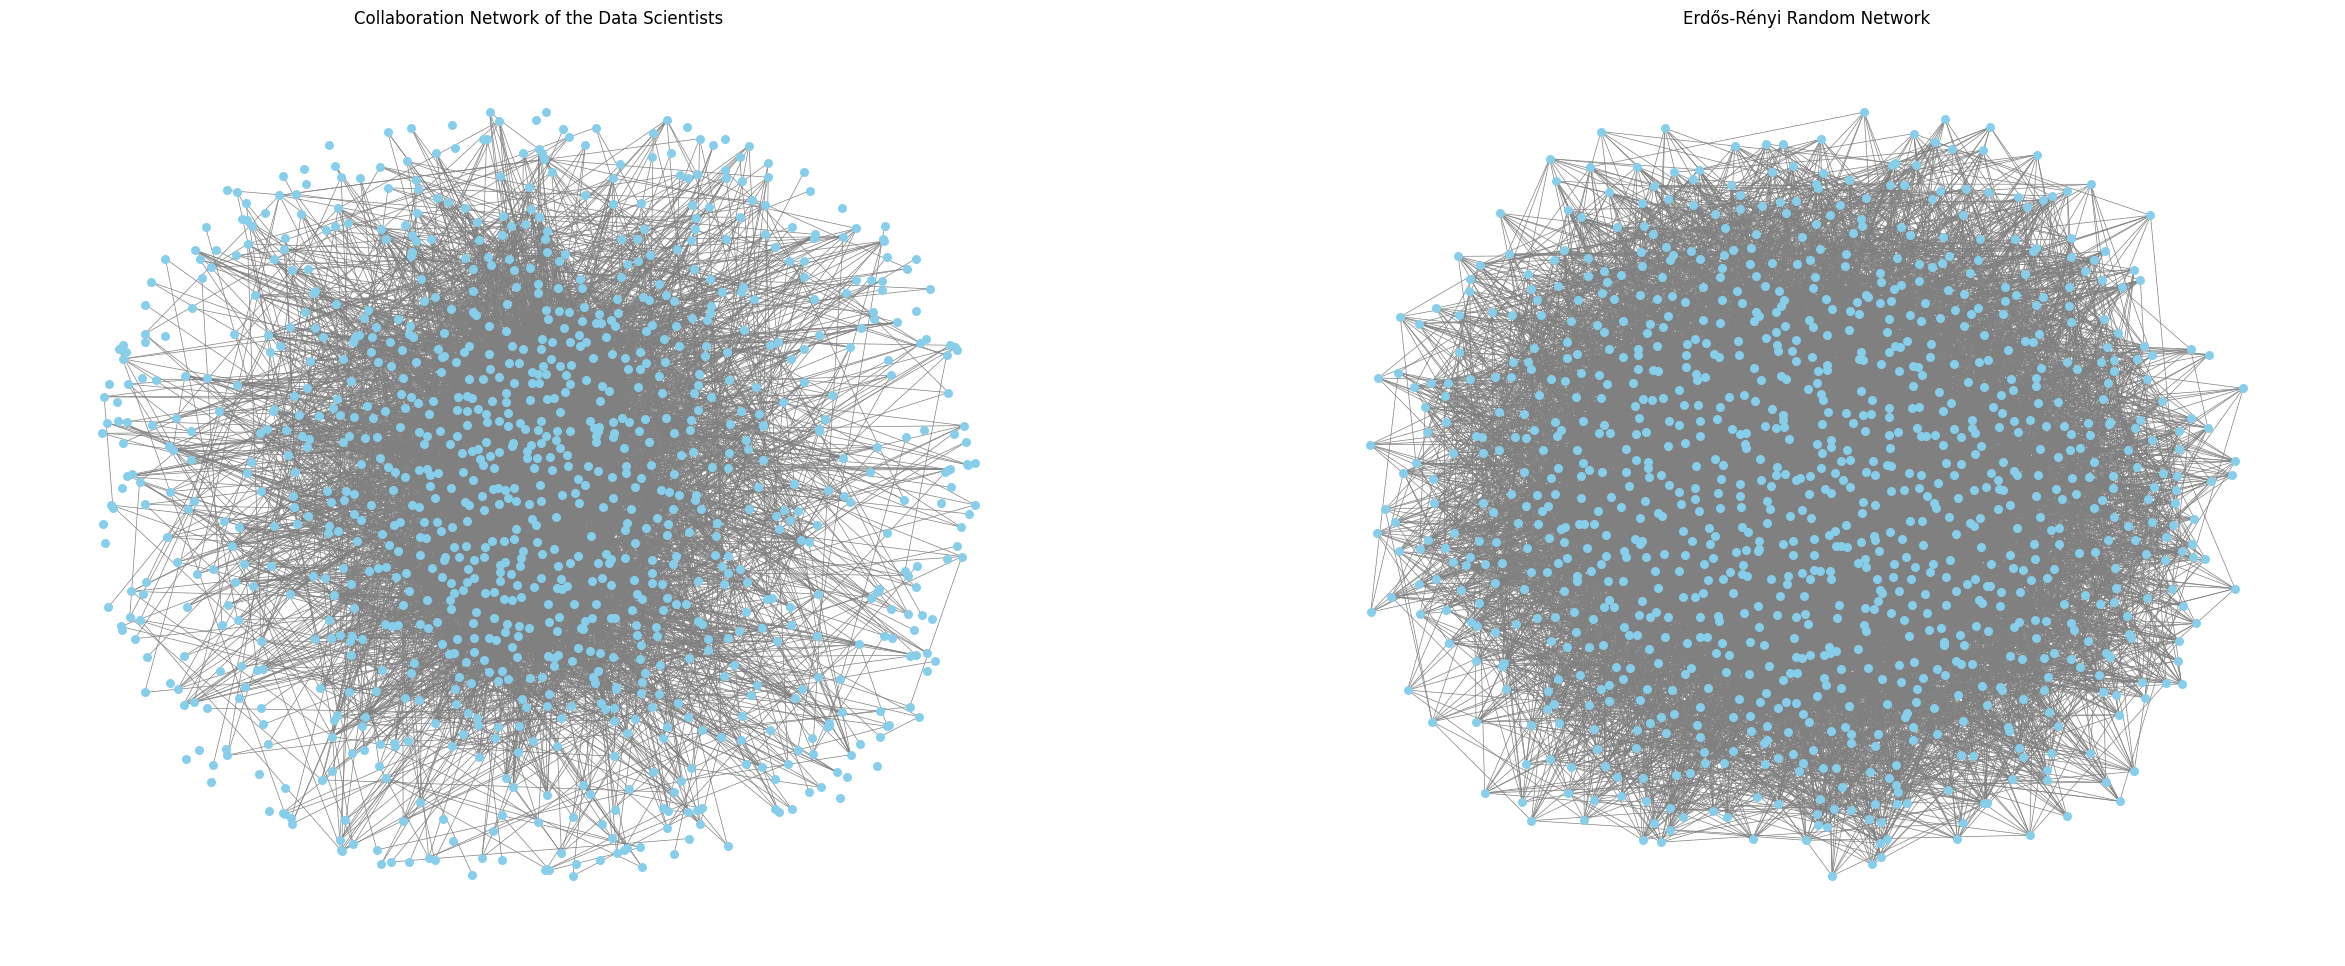

In [14]:
# Generate the Erdős-Rényi random network with the same number of nodes and edge probability
random_network = nx.erdos_renyi_graph(n=N, p=p, seed=42)

# Display the Erdős-Rényi random network and the collaboration network of the data scientists side by side
plt.figure(figsize=(30, 12))

# Plot the collaboration network of the data scientists
plt.subplot(1, 2, 1)
plt.title('Collaboration Network of the Data Scientists')
pos = nx.spring_layout(G, seed=42, k=0.6)
nx.draw(G, pos, with_labels=False, node_size=30, edge_color='gray', node_color='skyblue', width=0.5)

# Plot the Erdős-Rényi random network
plt.subplot(1, 2, 2)
plt.title('Erdős-Rényi Random Network')
pos = nx.spring_layout(random_network, seed=42, k=0.6)
nx.draw(random_network, pos, with_labels=False, node_size=30, edge_color='gray', node_color='skyblue', width=0.5)

# Display the number of nodes and edges in the random network
print(
    f'The Erdős-Rényi random network has {random_network.number_of_nodes()} nodes and {random_network.number_of_edges()} edges.')

# Save the plot as a PNG file in the 'plots' directory
#plt.savefig(plots_dir + 'collaboration_network_random_network.png', bbox_inches='tight')
plt.show()

As we can see, the degrees of the nodes in the Erdős-Rényi random network are distributed more uniformly compared to the collaboration network of the data scientists. This is because the Erdős-Rényi random network is generated based on the edge probability p, which results in a more uniform distribution of the degrees, as each edge is created independently with the same probability. The original network, on the other hand, is a scale-free network, where the degrees of the nodes follow a power-law distribution, thus we can see that only the central nodes have high degrees, while in the random network there isn't such well-defined center. The connectivity is spread everywhere. Despite that the networks have the same number of nodes and edges, they have different structures. Now, we will compare the degree distribution of the collaboration network of the data scientists with the Erdős-Rényi random network.

### 4.3 Degree Distribution Comparison
In this section, we will compare the degree distribution of the collaboration network of the data scientists with the Erdős-Rényi random network. Analyzing the degree distribution of the network will help us understand the difference between the scale-free network and the random network.

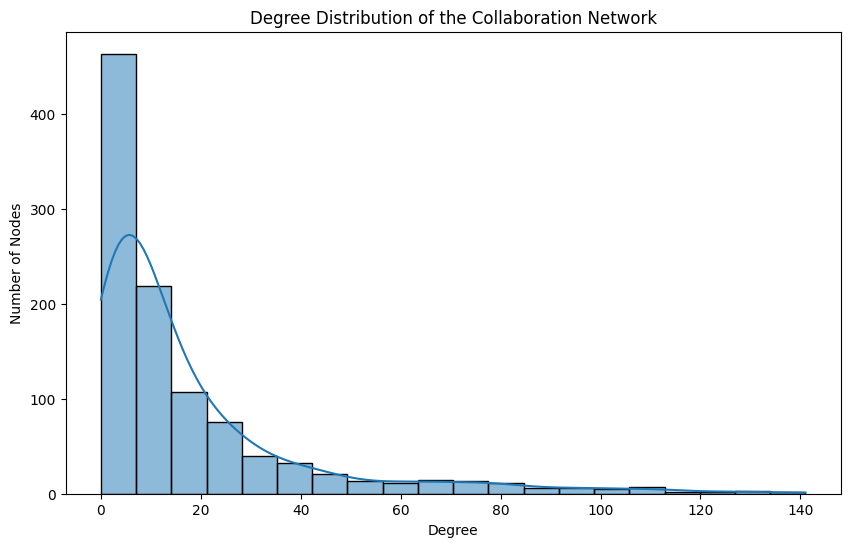

<ipython-input-16-e8ecf4305de8>:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1)


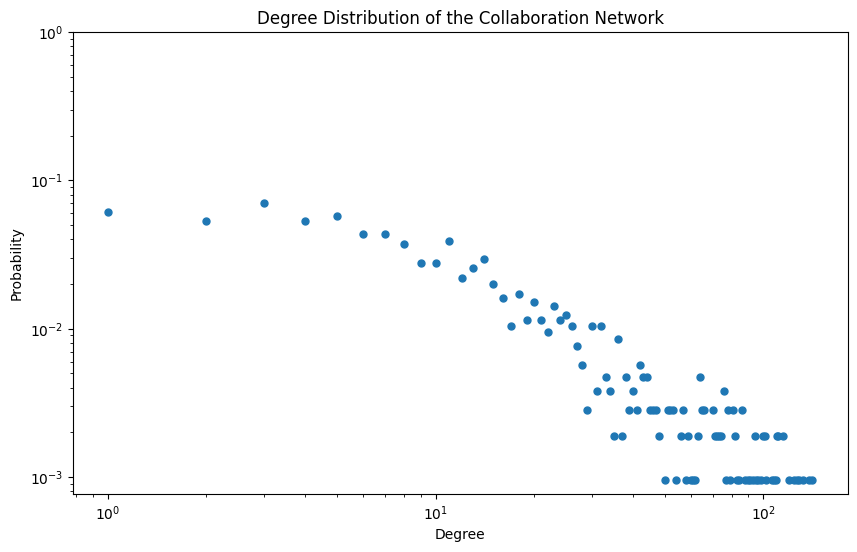

In [16]:
def plot_degree_distribution(G, y_axis='count'):
    degrees = [degree for node, degree in G.degree()]
    if y_axis == 'count':
        sns.histplot(degrees, bins=20, kde=True)
        plt.ylabel('Number of Nodes')
    elif y_axis == 'probability':
        degree_freq = nx.degree_histogram(G)
        degrees = range(len(degree_freq))
        # Normalize the degree frequencies by the total number of nodes
        degree_freq = [freq / G.number_of_nodes() for freq in degree_freq]
        plt.loglog(degrees, degree_freq, 'o', markersize=5)
        plt.ylabel('Probability')
        # Set the limits of the y-axis to be between 1/N and 1
        plt.ylim(0, 1)
    plt.title('Degree Distribution of the Collaboration Network')
    plt.xlabel('Degree')


# Display both the degree distribution of the Graph (count) and the log-log degree distribution (probability) on a single row
plt.figure(figsize=(10, 6))
plot_degree_distribution(G, y_axis='count')
# Save the plot as a PNG file in the 'plots' directory
#plt.savefig(plots_dir + 'degree_distribution_count.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10, 6))
plot_degree_distribution(G, y_axis='probability')
# Save the plot as a PNG file in the 'plots' directory
#plt.savefig(plots_dir + 'degree_distribution_probability.png', bbox_inches='tight')
plt.show()

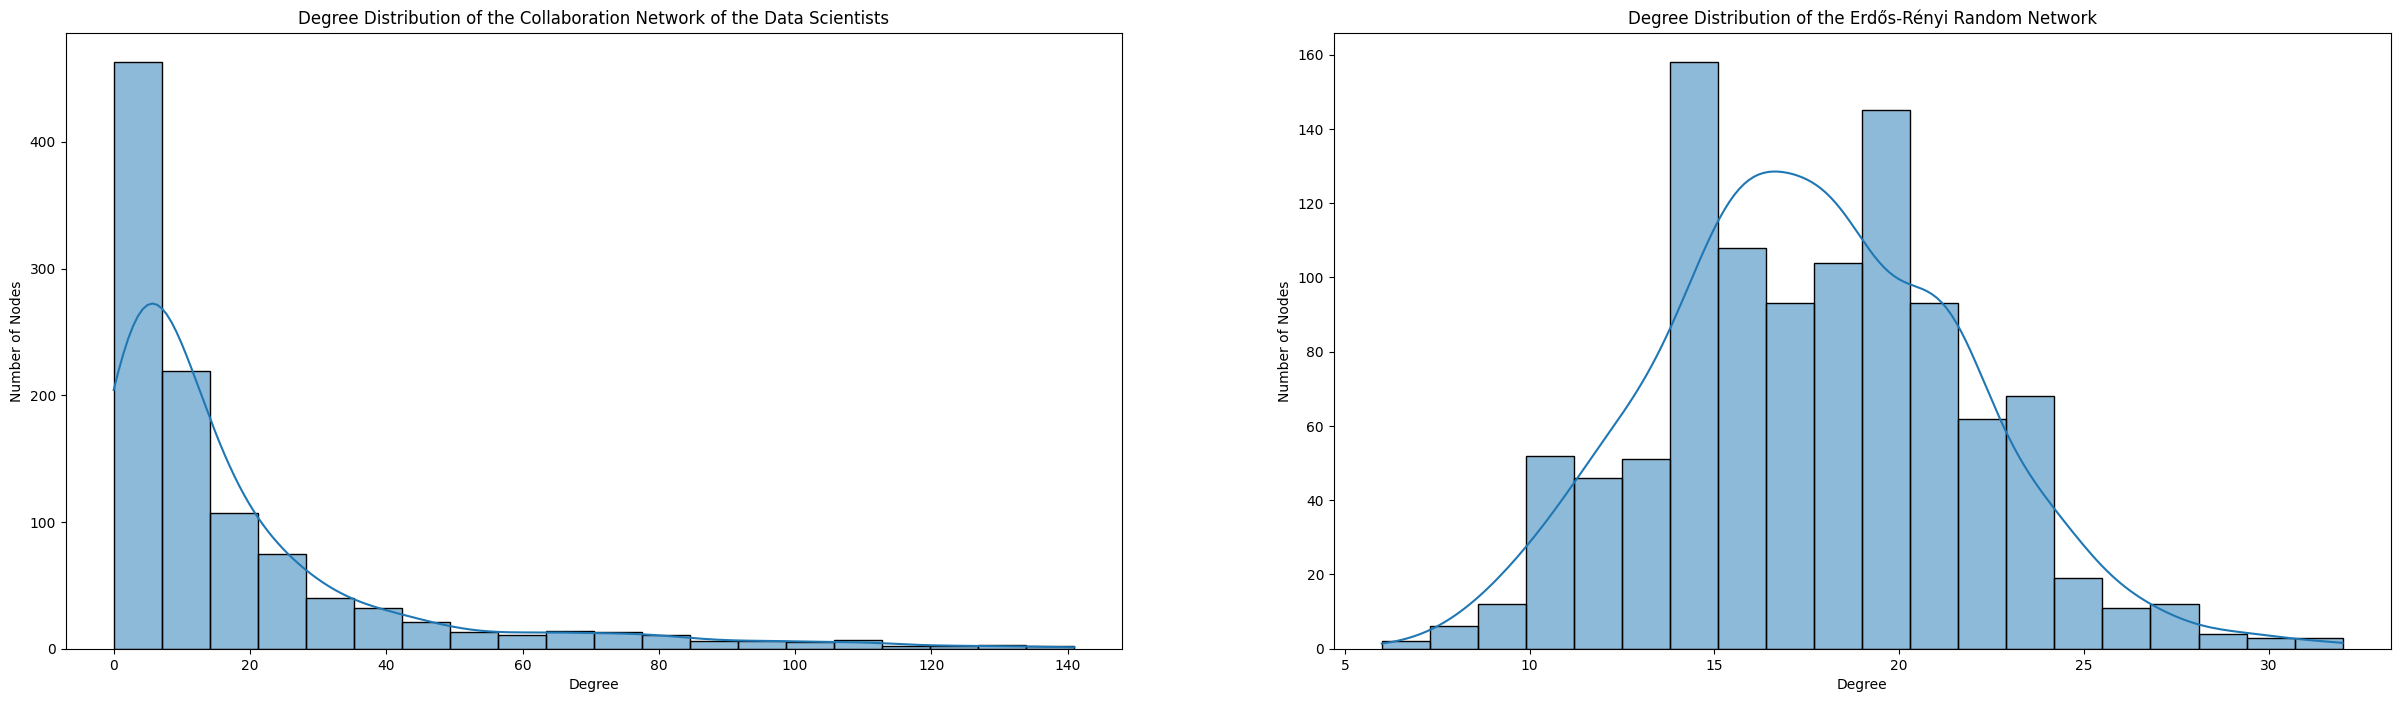

<ipython-input-16-e8ecf4305de8>:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1)


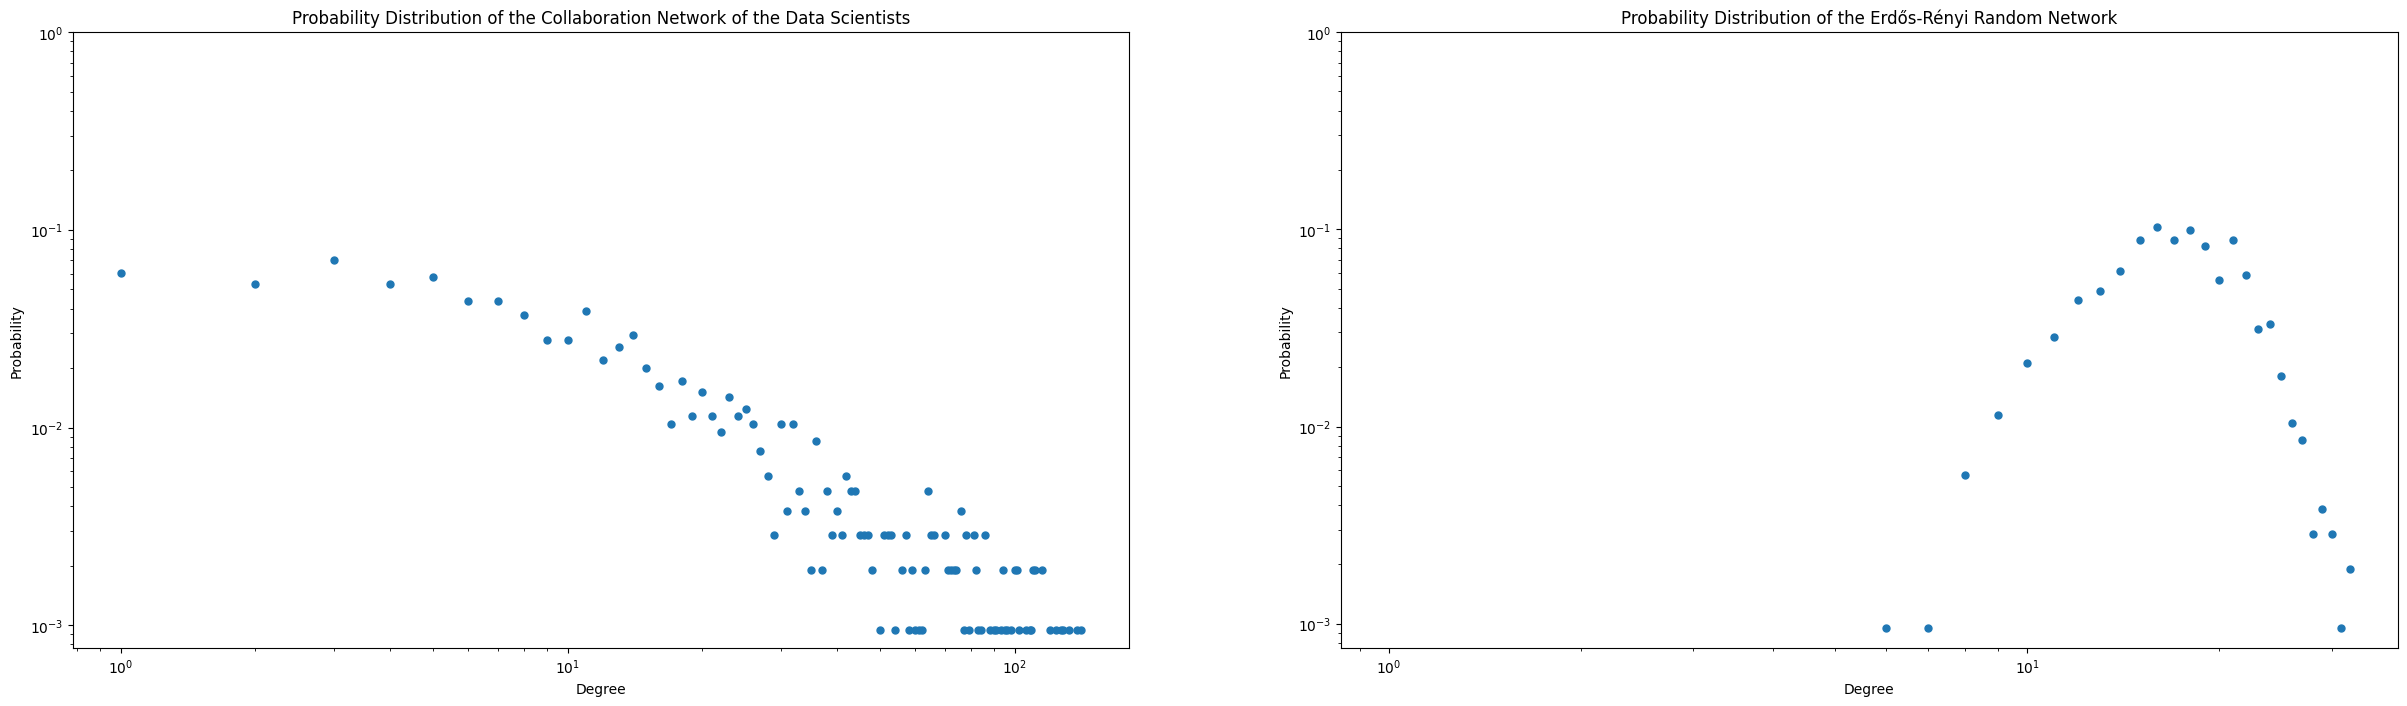

In [18]:
# Plot the degree distribution of the collaboration network of the data scientists and the Erdős-Rényi random network side by side
plt.figure(figsize=(30, 8))

# Plot the degree distribution of the collaboration network of the data scientists
plt.subplot(1, 2, 1)
plot_degree_distribution(G, y_axis='count')
plt.title('Degree Distribution of the Collaboration Network of the Data Scientists')

# Plot the degree distribution of the Erdős-Rényi random network
plt.subplot(1, 2, 2)
plot_degree_distribution(random_network, y_axis='count')
plt.title('Degree Distribution of the Erdős-Rényi Random Network')

# Save the plots as PNG files in the 'plots' directory
#plt.savefig(plots_dir + 'degree_distribution_random_comparison.png', bbox_inches='tight')
plt.show()

# Plot the probability distribution of the collaboration network of the data scientists and the Erdős-Rényi random network side by side
plt.figure(figsize=(30, 8))

# Plot the probability distribution of the collaboration network of the data scientists
plt.subplot(1, 2, 1)
plot_degree_distribution(G, y_axis='probability')
plt.title('Probability Distribution of the Collaboration Network of the Data Scientists')

# Plot the probability distribution of the Erdős-Rényi random network
plt.subplot(1, 2, 2)
plot_degree_distribution(random_network, y_axis='probability')
plt.title('Probability Distribution of the Erdős-Rényi Random Network')

# Save the plots as PNG files in the 'plots' directory
#plt.savefig(plots_dir + 'degree_distribution_random_comparison_scatter.png', bbox_inches='tight')
plt.show()

As expected, the degree distribution of the collaboration network of the data scientists follows a power-law distribution, while the degree distribution of the Erdős-Rényi random network follows a Poisson distribution. The power-law distribution indicates that the collaboration network of the data scientists is a scale-free network, where the degrees of the nodes follow a power-law distribution. This means that there are a few nodes with a high degree (hubs) and many nodes with a low degree, which is typical for real-world networks. On the other hand, the Poisson distribution of the Erdős-Rényi random network indicates that the degrees of the nodes are distributed more uniformly, as each edge is created independently with the same probability. As we can see on the plots, the degree distribution of the real network expands much more to the right than the random network. Now, we will compare the distance and diameter of the collaboration network of the data scientists with the Erdős-Rényi random network.

### 4.4 Distance & Diameter Comparison
In this section, we will compare the average shortest path length and the diameter of the collaboration network of the data scientists with the Erdős-Rényi random network. Analyzing the distance and diameter of the network will help us understand the connectivity and efficiency of the network.

In [19]:
# Display the average shortest path length and the diameter of the largest component of the collaboration network of the data scientists
largest_cc_G = max(nx.connected_components(G), key=len)
avg_shortest_path_length_G = nx.average_shortest_path_length(G.subgraph(largest_cc_G))
diameter_G = nx.diameter(G.subgraph(largest_cc_G))
print(
    f'The average shortest path length of the collaboration network of the data scientists is <d>={avg_shortest_path_length_G:.4f}')
print(f'The diameter of the collaboration network of the data scientists is d_max={diameter_G}')
# Display the number of nodes isolated from the main component of the collaboration network of the data scientists
isolated_nodes_G = G.number_of_nodes() - nx.number_of_nodes(G.subgraph(largest_cc_G))
print(
    f'The number of nodes isolated from the main component of the collaboration network of the data scientists is {isolated_nodes_G}\n')

# Display the average shortest path length and the diameter of the Erdős-Rényi random network
largest_cc_random_network = max(nx.connected_components(random_network), key=len)
avg_shortest_path_length_random_network = nx.average_shortest_path_length(
    random_network.subgraph(largest_cc_random_network))
diameter_random_network = nx.diameter(random_network.subgraph(largest_cc_random_network))
print(
    f'The average shortest path length of the Erdős-Rényi random network is <d>={avg_shortest_path_length_random_network:.4f}')
print(f'The diameter of the Erdős-Rényi random network is d_max={diameter_random_network}')
# Display the number of nodes isolated from the main component of the Erdős-Rényi random network
isolated_nodes_random_network = list(nx.isolates(random_network))
print(
    f'The number of nodes isolated from the main component of the Erdős-Rényi random network is {len(isolated_nodes_random_network)}')

The average shortest path length of the collaboration network of the data scientists is <d>=3.1201
The diameter of the collaboration network of the data scientists is d_max=9
The number of nodes isolated from the main component of the collaboration network of the data scientists is 70

The average shortest path length of the Erdős-Rényi random network is <d>=2.7285
The diameter of the Erdős-Rényi random network is d_max=4
The number of nodes isolated from the main component of the Erdős-Rényi random network is 0


As we can see, both the average shortest path length and the diameter of the collaboration network of the Erdős-Rényi random network lower than the collaboration network of the data scientists. This is because in the random network, the nodes are connected more uniformly, while in the real collaboration network we have hubs but also many nodes with low degrees and several isolated ones. Now, we will compare the clustering coefficient of the collaboration network of the data scientists with the Erdős-Rényi random network.

### 4.5 Clustering Coefficient Comparison
In this section, we will compare the clustering coefficient of the collaboration network of the data scientists with the Erdős-Rényi random network. Analyzing the clustering coefficient of the network will help us understand the local connectivity of the network. First, we will compare the average clustering coefficients of the networks.

In [20]:
# Calculate the average clustering coefficient of real and random networks
avg_clustering_coefficient_G = nx.average_clustering(G)
avg_clustering_coefficient_random_network = nx.average_clustering(random_network)

# Display the average clustering coefficients of the real and random networks
print(
    f'The average clustering coefficient of the collaboration network of the data scientists is <C>={avg_clustering_coefficient_G:.4f}')
print(
    f'The average clustering coefficient of the Erdős-Rényi random network is <C>={avg_clustering_coefficient_random_network:.4f}')

The average clustering coefficient of the collaboration network of the data scientists is <C>=0.3178
The average clustering coefficient of the Erdős-Rényi random network is <C>=0.0166


As we know, the average clustering coefficient of the random networks is lower than the one of scale-free networks. Now, let's plot the clustering coefficient distribution of the collaboration network of the data scientists and the Erdős-Rényi random network to further analyze them.

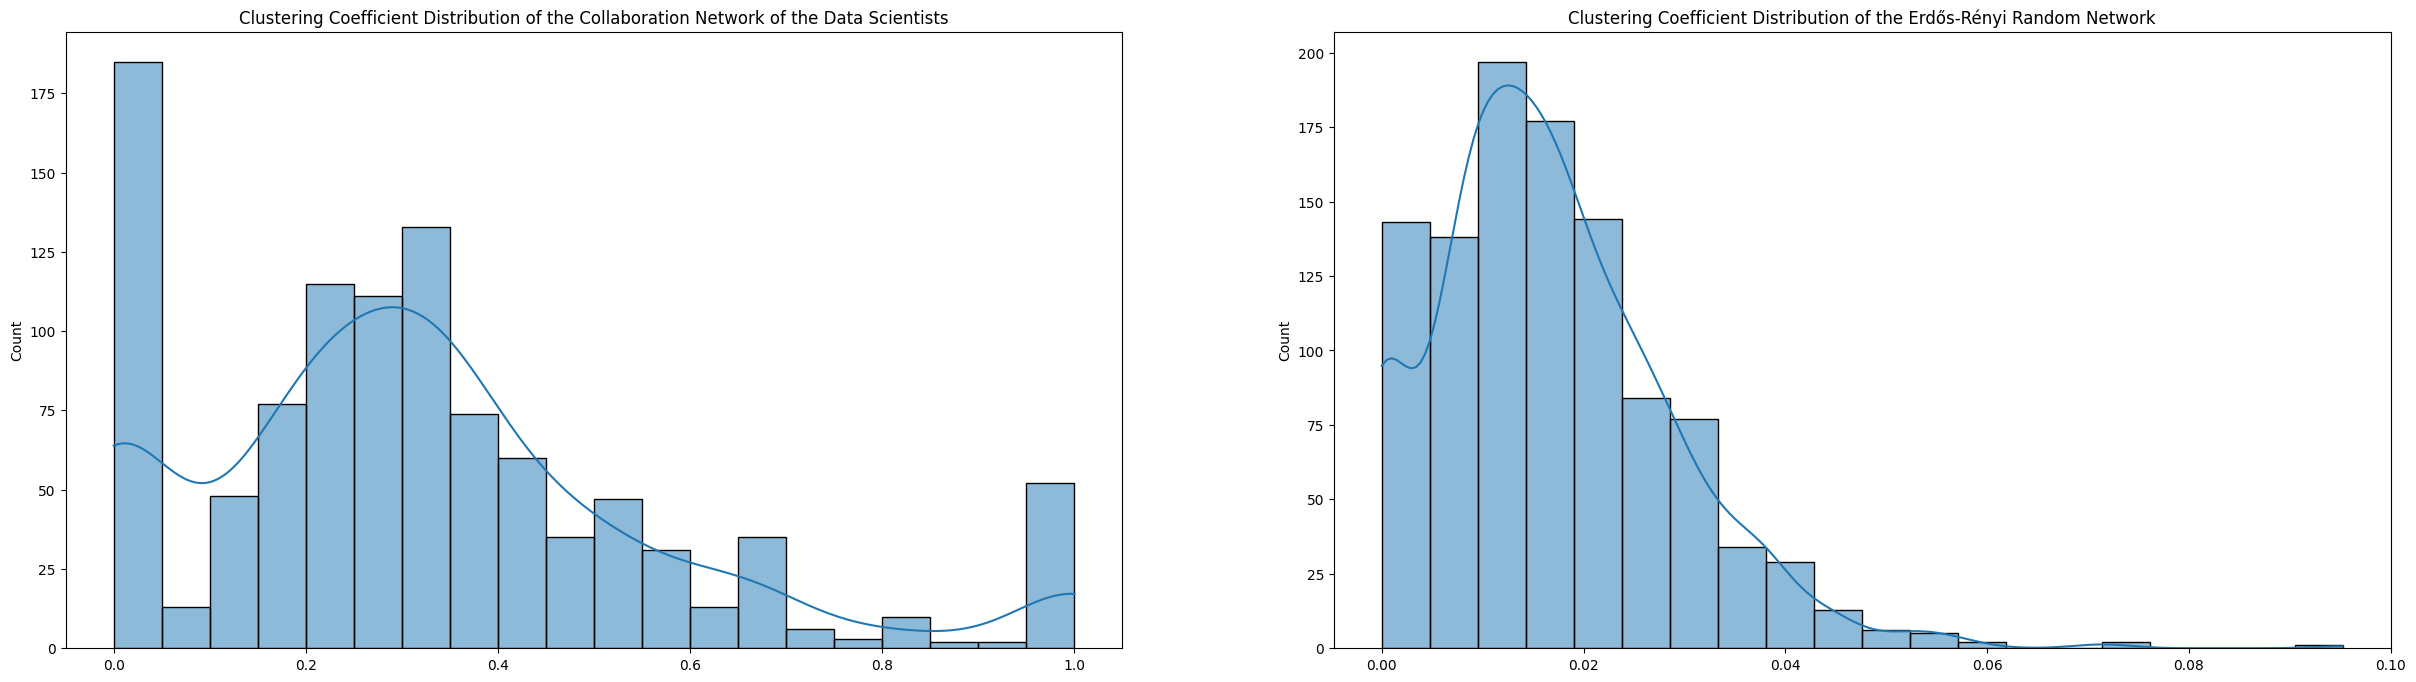

In [22]:
# Compute the clustering coefficient of the nodes in the collaboration network of the data scientists and the Erdős-Rényi random network
clustering_coefficients_G = nx.clustering(G)
clustering_coefficients_random_network = nx.clustering(random_network)

# Plot the clustering coefficient distribution of the collaboration network of the data scientists and the Erdős-Rényi random network
plt.figure(figsize=(30, 8))

# Plot the clustering coefficient distribution of the collaboration network of the data scientists
plt.subplot(1, 2, 1)
sns.histplot(list(clustering_coefficients_G.values()), bins=20, kde=True)
plt.title('Clustering Coefficient Distribution of the Collaboration Network of the Data Scientists')

# Plot the clustering coefficient distribution of the Erdős-Rényi random network
plt.subplot(1, 2, 2)
sns.histplot(list(clustering_coefficients_random_network.values()), bins=20, kde=True)
plt.title('Clustering Coefficient Distribution of the Erdős-Rényi Random Network')

# Save the plots as PNG files in the 'plots' directory
#plt.savefig(plots_dir + 'clustering_coefficient_distribution_random_comparison.png', bbox_inches='tight')
plt.show()

As we can see, the clustering coefficient distributions of the networks are different. The distribution of the original collaboration network has many anomalies and is not uniform, this is caused by the hubs in the network and isolated nodes. The Erdős-Rényi random network has a more uniform distribution of the clustering coefficients. Now, we will analyze the local clustering coefficients of the nodes with respect to their degrees in the collaboration network of the data scientists and the Erdős-Rényi random network.

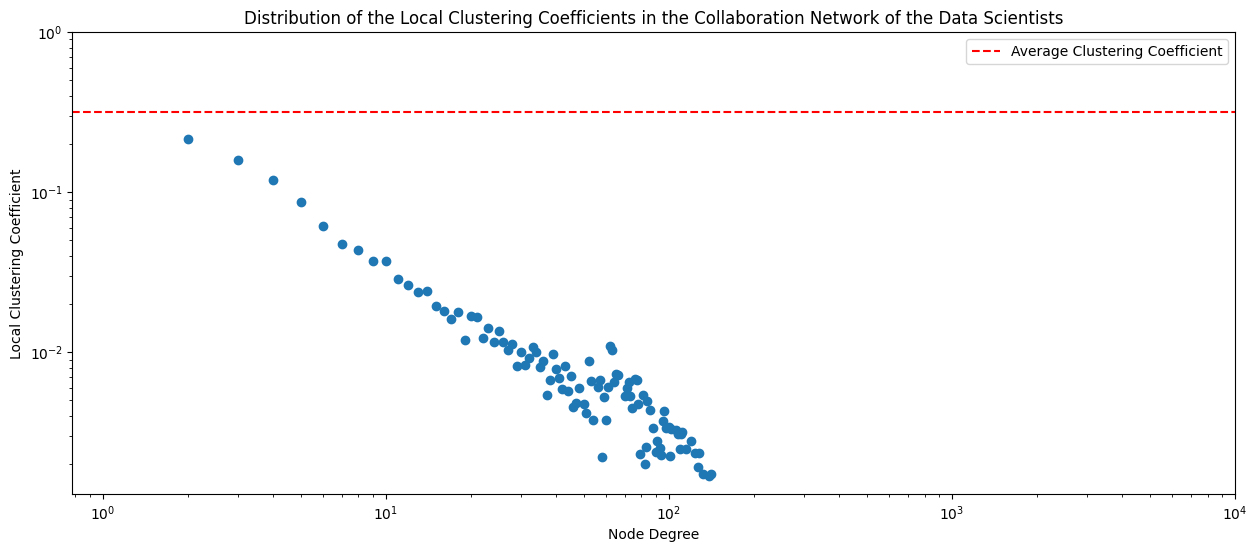

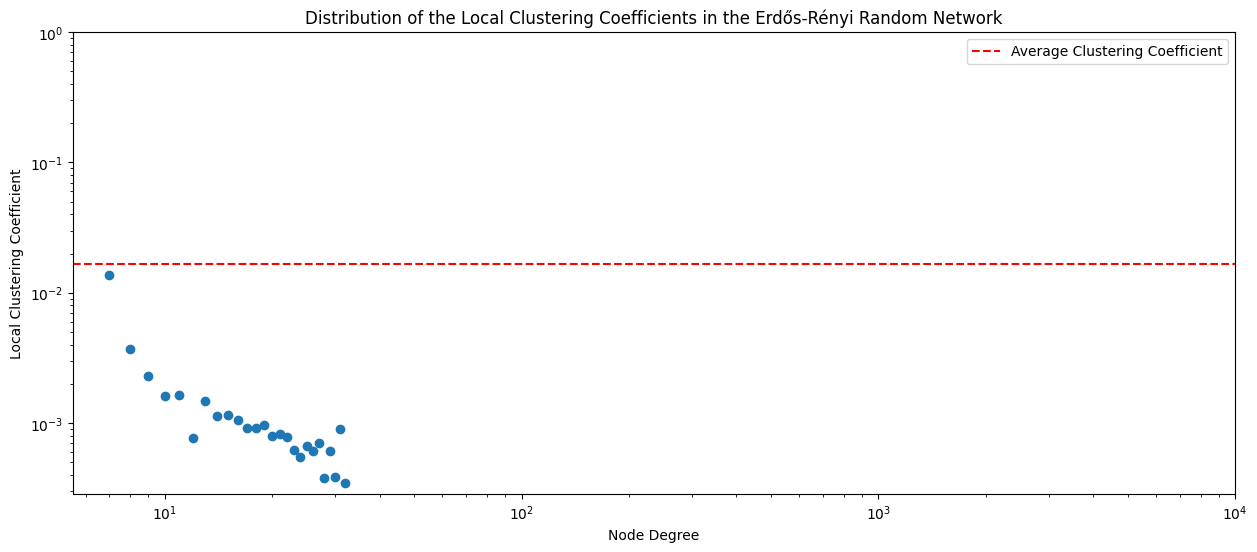

In [23]:
# Calculate the local clustering coefficients of the nodes in the collaboration network of the data scientists
clustering_coefficients = nx.clustering(G)

# Calculate the local clustering coefficient of the nodes in the Erdős-Rényi random network
clustering_coefficients_random_network = nx.clustering(random_network)

# Normalize the clustering coefficients by the total number of nodes
for node in G.nodes():
    # Check if the node has no neighbours
    if G.degree(node) == 0:
        clustering_coefficients[node] = 0
    else:
        clustering_coefficients[node] = clustering_coefficients[node] / G.degree(node)

# Normalize the clustering coefficients of the Erdős-Rényi random network by the total number of nodes
for node in random_network.nodes():
    # Check if the node has no neighbours
    if random_network.degree(node) == 0:
        clustering_coefficients_random_network[node] = 0
    else:
        clustering_coefficients_random_network[node] = clustering_coefficients_random_network[
                                                           node] / random_network.degree(node)

cc_degrees = {}
for node in G.nodes():
    if G.degree(node) not in cc_degrees:
        cc_degrees[G.degree(node)] = [clustering_coefficients[node]]
    else:
        cc_degrees[G.degree(node)].append(clustering_coefficients[node])

cc_degrees_random_network = {}
for node in random_network.nodes():
    if random_network.degree(node) not in cc_degrees_random_network:
        cc_degrees_random_network[random_network.degree(node)] = [clustering_coefficients_random_network[node]]
    else:
        cc_degrees_random_network[random_network.degree(node)].append(clustering_coefficients_random_network[node])

# Calculate the average local clustering coefficient of the nodes
avg_cc_degrees = {degree: np.mean(cc) for degree, cc in cc_degrees.items()}

# Calculate the average local clustering coefficient of the nodes in the Erdős-Rényi random network
avg_cc_degrees_random_network = {degree: np.mean(cc) for degree, cc in cc_degrees_random_network.items()}

# Plot the distribution of the local clustering coefficients of the nodes with respect to the node degrees in the collaboration network of the data scientists
plt.figure(figsize=(15, 6))
plt.scatter(avg_cc_degrees.keys(), avg_cc_degrees.values())
plt.axhline(y=avg_clustering_coefficient_G, color='r', linestyle='--', label='Average Clustering Coefficient')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribution of the Local Clustering Coefficients in the Collaboration Network of the Data Scientists')
plt.xlabel('Node Degree')
plt.ylabel('Local Clustering Coefficient')
plt.legend()
plt.xlim(right=1e4)
plt.ylim(top=1)
plt.show()

# Plot the distribution of the local clustering coefficients of the nodes with respect to the node degrees in the Erdős-Rényi random network
plt.figure(figsize=(15, 6))
plt.scatter(avg_cc_degrees_random_network.keys(), avg_cc_degrees_random_network.values())
plt.axhline(y=avg_clustering_coefficient_random_network, color='r', linestyle='--',
            label='Average Clustering Coefficient')
plt.xscale('log')
plt.yscale('log')
plt.title('Distribution of the Local Clustering Coefficients in the Erdős-Rényi Random Network')
plt.xlabel('Node Degree')
plt.ylabel('Local Clustering Coefficient')
plt.legend()
plt.xlim(right=1e4)
plt.ylim(top=1)
# Save the plots as PNG files in the 'plots' directory
#plt.savefig(plots_dir + 'local_clustering_coefficient_distribution_random_comparison.png', bbox_inches='tight')
plt.show()

As we can see, the average local clustering coefficient of the nodes with respect to their degrees distributions are quite different. But in both cases, the higher the degree of the node, the smaller the clustering coefficient is. This is because it is harder to have highly connected neighbours if you have many neighbours. The clustering coefficient in the Erdős-Rényi random network is smaller compared to the original collaboration network, this is because most nodes have similar degrees and the network is random, so the neighbours of a node don't know that they are neighbours, they have the same probability to be connected to any other node. On the other hand, in the real world, the nodes are real people, and they tend to connect to the friends of their friends, so the clustering coefficient is higher. Now, we will compare the centrality of the collaboration network of the data scientists with the Erdős-Rényi random network.

### 4.6 Centrality Comparison
In this section, we will compare the centrality of the collaboration network of the data scientists with the Erdős-Rényi random network. We will analyze the degree centrality, closeness centrality, eigenvector centrality, and betweenness centrality of the nodes in the networks. Analyzing the centrality of the network will help us understand the importance of the nodes in the network.

In [24]:
# Calculate the degree centrality of the nodes in the Erdős-Rényi random network
degree_centrality = nx.degree_centrality(random_network)

# Calculate the closeness centrality of the nodes in the Erdős-Rényi random network
closeness_centrality = nx.closeness_centrality(random_network)

# Calculate the betweenness centrality of the nodes in the Erdős-Rényi random network
betweenness_centrality = nx.betweenness_centrality(random_network)

# Calculate the eigenvector centrality of the nodes in the Erdős-Rényi random network
eigenvector_centrality = nx.eigenvector_centrality(random_network)

# Create a DataFrame to hold the centrality measures
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
})

# Display the DataFrame with the centrality measures
centrality_df.head(10)

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality
0,0.016175,0.368513,0.001425,0.030768
1,0.011418,0.354588,0.000679,0.021436
2,0.018078,0.370070,0.001693,0.033444
3,0.015224,0.362664,0.001354,0.026076
4,0.017127,0.372035,0.001671,0.033790
5,0.014272,0.358092,0.001150,0.022962
6,0.014272,0.364046,0.001096,0.026555
7,0.018078,0.369680,0.001681,0.032828
8,0.017127,0.368384,0.001655,0.029373
9,0.015224,0.363668,0.001341,0.026678


Having computed the centrality measures for the nodes in the network, now we will further analyze each centrality measure individually.

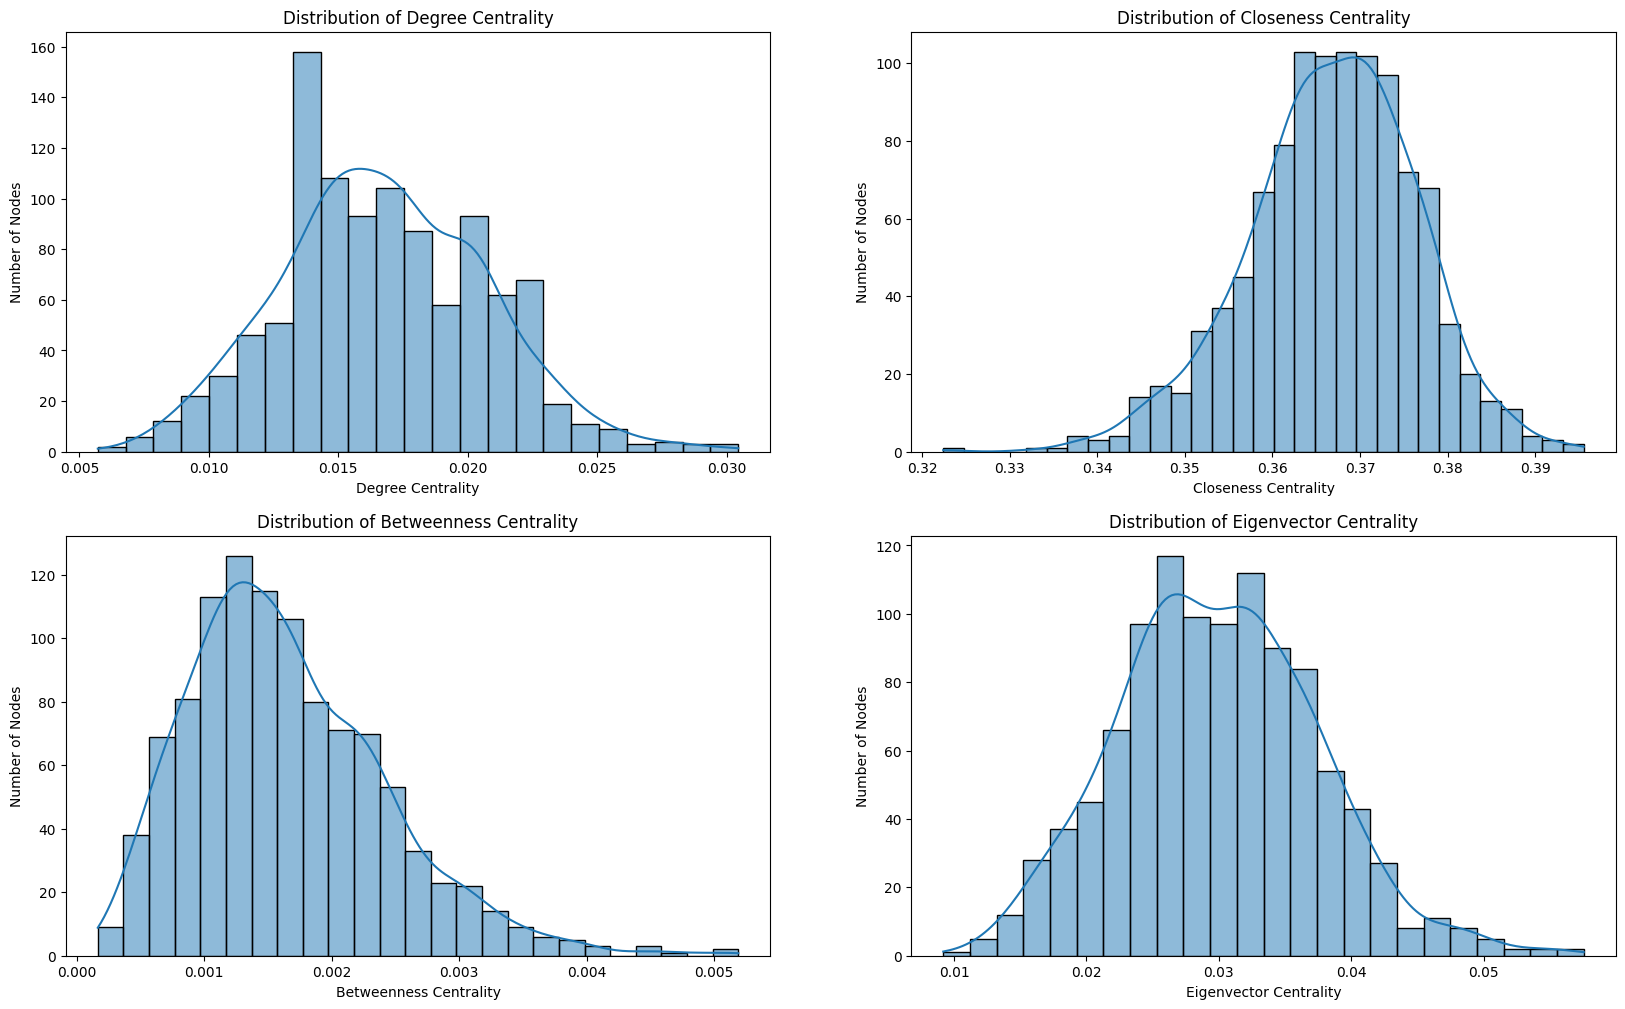

In [26]:
# Plot all centrality measures on a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

for i, centrality in enumerate(centrality_df.columns):
    # Plot the centrality measure
    sns.histplot(centrality_df[centrality], kde=True, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f'Distribution of {centrality}')
    axs[i // 2, i % 2].set_xlabel(centrality)
    axs[i // 2, i % 2].set_ylabel('Number of Nodes')

# Save the plot as a PNG file in the 'plots' directory
#plt.savefig(plots_dir + 'centrality_distribution_random_comparison.png', bbox_inches='tight')

Now, we will compare the Close Centrality of the nodes in the collaboration network of the data scientists with the Erdős-Rényi random network.

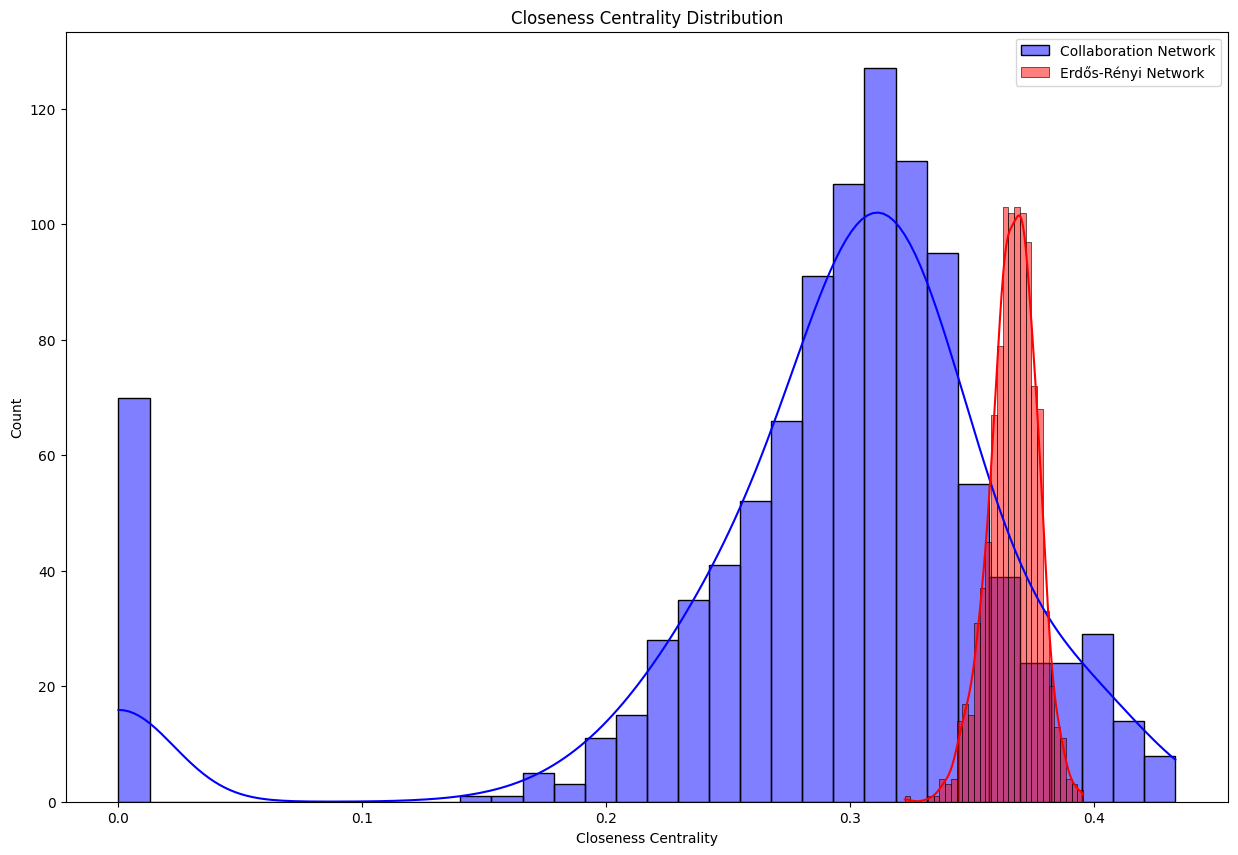

In [28]:
# Calculate the closeness centrality of the nodes in the collaboration network of the data scientists
closeness_centrality = nx.closeness_centrality(G)

# Calculate the closeness centrality of the nodes in the Erdős-Rényi random network
closeness_centrality_random_network = nx.closeness_centrality(random_network)

# Plot the closeness centrality of the nodes in the collaboration network of the data scientists and the Erdős-Rényi random network
plt.figure(figsize=(15, 10))

# Plot the closeness centrality of the nodes in the collaboration network of the data scientists
sns.histplot(list(closeness_centrality.values()), kde=True, color='blue', label='Collaboration Network')

# Plot the closeness centrality of the nodes in the Erdős-Rényi random network
sns.histplot(list(closeness_centrality_random_network.values()), kde=True, color='red', label='Erdős-Rényi Network')

plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Count')
plt.legend()

# Save the plot as a PNG file in the 'plots' directory
#plt.savefig(plots_dir + 'closeness_centrality_distribution_random_comparison.png', bbox_inches='tight')
plt.show()

As we can see, the closeness centrality of the nodes in the Erdős-Rényi random network distributed in much narrower range compared to the one of the original collaboration network. This is because in the random network the nodes are connected more uniformly, while in the real collaboration network we have hubs but also many nodes with low degrees and several isolated ones. Thus, in the random networks, the nodes are closer to each other on average, and we don't have such a big difference between the centrality of the nodes. Now, we will continue to the last subsection of comparing the real network with the random one, by comparing the counties distribution of the nodes in the networks.

### 4.7 Country Comparison
In this section, we will compare the distribution of the countries of the data scientists in the collaboration network with the Erdős-Rényi random network. Analyzing the country distribution of the network will help us understand the diversity of the data scientists in the network. First, we will again need to construct the random network with the same number of nodes and edges as the collaboration network of the data scientists.

In [31]:
# Read the scientists' information from the CSV file
scientists_df = pd.read_csv('scientists_clean.csv')

# Create a dictionary to hold the collaboration network based on the countries
collaboration_network_countries = {}

# Iterate over the collaboration network
for author, collaborators in collaboration_network.items():
    # Get the country of the author
    author_country = scientists_df[scientists_df['pid'] == author]['country'].values[0]
    # Convert the country to a set
    if '{' in author_country:
        author_country = ast.literal_eval(author_country)
    else:
        author_country = {author_country}
    # For each author's country
    for ac in author_country:
        # If the author's country is not in the collaboration network, add it
        if ac not in collaboration_network_countries:
            collaboration_network_countries[ac] = []
    # Get the countries of the collaborators
    collaborators_countries = [scientists_df[scientists_df['pid'] == collaborator]['country'].values[0] for collaborator
                               in collaborators.keys()]
    # Convert the countries if they are sets
    collaborators_countries = [country if '{' not in country else ast.literal_eval(country) for country in
                               collaborators_countries]
    # For each author's country
    for ac in author_country:
        # Iterate over the collaborators' countries
        for c in collaborators_countries:
            # If the collaborator's country is not in the author's country collaborators, add it
            if isinstance(c, set):
                collaboration_network_countries[ac].extend(c)
            else:
                collaboration_network_countries[ac].append(c)

# Iterate over the collaboration network based on the countries
for country, collaborator_countries in collaboration_network_countries.items():
    # Convert the list of collaborators to a dictionary with the counts
    collaboration_network_countries[country] = {c: {'count': collaborator_countries.count(c)} for c in
                                                set(collaborator_countries)}

# Show a formated preview of the collaboration network based on the countries
for country, collaborators in list(collaboration_network_countries.items())[:3]:
    print(f'---{country}: {collaborators}')

---united kingdom: {'poland': {'count': 1}, 'singapore': {'count': 2}, 'greece': {'count': 9}, 'india': {'count': 11}, 'australia': {'count': 5}, 'finland': {'count': 1}, 'qatar': {'count': 2}, 'chile': {'count': 2}, 'united kingdom': {'count': 24}, 'israel': {'count': 1}, 'austria': {'count': 1}, 'crete': {'count': 1}, 'belgium': {'count': 5}, 'switzerland': {'count': 4}, 'brazil': {'count': 4}, 'estonia': {'count': 1}, 'germany': {'count': 19}, 'france': {'count': 3}, 'china': {'count': 11}, 'turkey': {'count': 3}, 'sweden': {'count': 1}, 'italy': {'count': 11}, 'japan': {'count': 2}, 'taiwan': {'count': 1}, 'united states': {'count': 70}, 'canada': {'count': 9}, 'hong kong sar': {'count': 6}, 'netherlands': {'count': 3}}
---south korea: {'italy': {'count': 3}, 'singapore': {'count': 8}, 'new zealand': {'count': 1}, 'japan': {'count': 2}, 'greece': {'count': 3}, 'germany': {'count': 8}, 'south korea': {'count': 18}, 'united states': {'count': 59}, 'france': {'count': 1}, 'luxembourg'

In [32]:
#The number of nodes and number of edges of the collaboration network
# Construct the collaboration network based on the countries using the same function as before
G_countries = generate_graph(collaboration_network_countries, weight_key='count')

print(
    f'The Graph based on the countries has {G_countries.number_of_nodes()} nodes and {G_countries.number_of_edges()} edges')

Nc = G_countries.number_of_nodes()
Lc = G_countries.number_of_edges()

#The edge probability needed for the ER random graph
Pc = Lc / (Nc * (Nc - 1) / 2)

print(f'The number of nodes in the original collaboration network is N={Nc}')
print(f'The number of edges in the collaboration network is L={Lc}')
print(f'The edge probability is P={Pc}')

The Graph based on the countries has 44 nodes and 422 edges
The number of nodes in the original collaboration network is N=44
The number of edges in the collaboration network is L=422
The edge probability is P=0.44608879492600423


Having computed the edge probability for the Erdős-Rényi random network, we can now generate the random network and compare the country distribution of the nodes in the collaboration network of the data scientists with the Erdős-Rényi random network.

The Erdős-Rényi random network has 44 nodes and 407 edges.


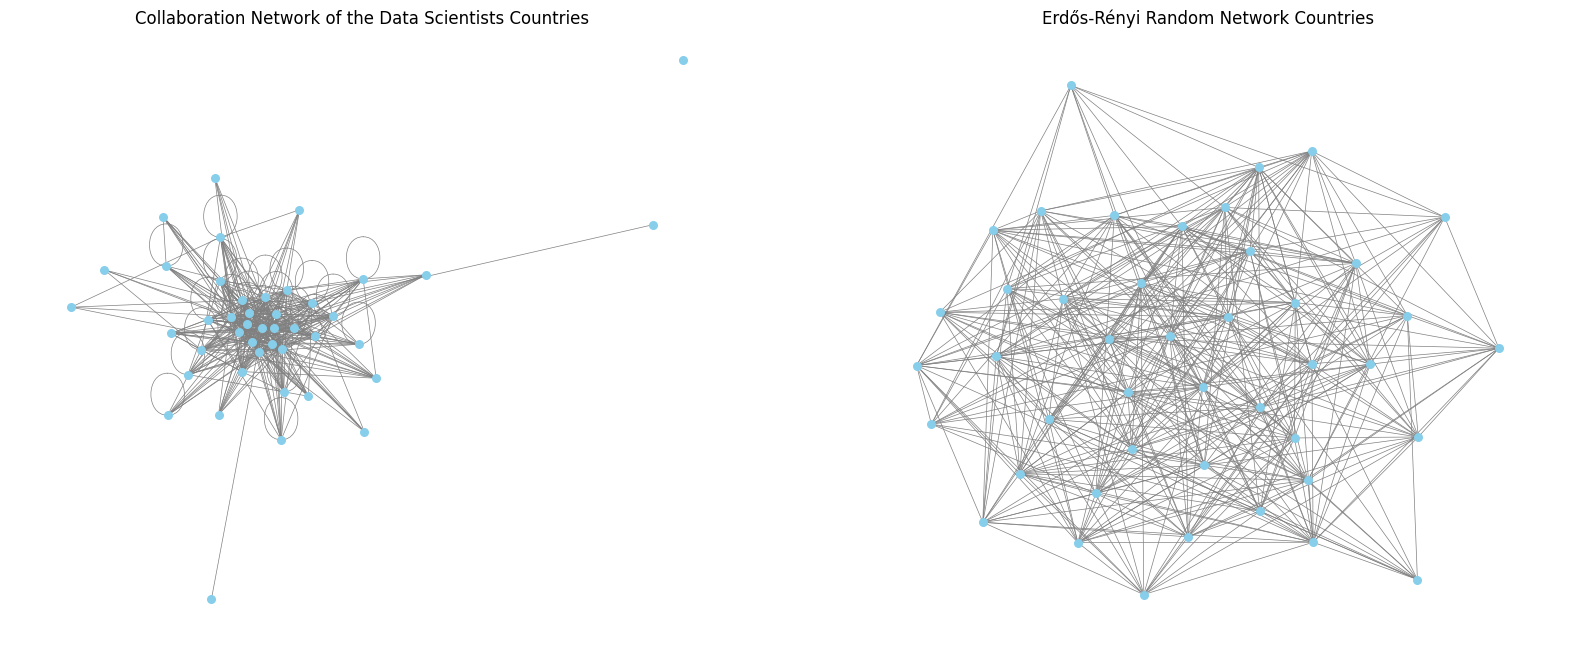

In [34]:
# Generate the Erdős-Rényi random network with the same number of nodes and edge probability
random_network_countries = nx.erdos_renyi_graph(n=Nc, p=Pc, seed=42)

# Display the Erdős-Rényi random network and the collaboration network of the data scientists side by side
plt.figure(figsize=(20, 8))

# Plot the collaboration network of the data scientists
plt.subplot(1, 2, 1)
plt.title('Collaboration Network of the Data Scientists Countries')
pos = nx.spring_layout(G_countries, seed=42, k=0.6)
nx.draw(G_countries, pos, with_labels=False, node_size=30, edge_color='gray', node_color='skyblue', width=0.5)

# Plot the Erdős-Rényi random network
plt.subplot(1, 2, 2)
plt.title('Erdős-Rényi Random Network Countries')
pos = nx.spring_layout(random_network_countries, seed=42, k=0.6)
nx.draw(random_network_countries, pos, with_labels=False, node_size=30, edge_color='gray', node_color='skyblue',
        width=0.5)

# Display the number of nodes and edges in the random network
print(
    f'The Erdős-Rényi random network has {random_network_countries.number_of_nodes()} nodes and {random_network_countries.number_of_edges()} edges.')

# Save the plot as a PNG file in the 'plots' directory
#plt.savefig(plots_dir + 'collaboration_network_random_network_countries.png', bbox_inches='tight')
plt.show()

As expected, none of the original network's characteristics are preserved in the random network. The nodes are connected more uniformly, and the network doesn't have the same structure as the original one.There are no hubs in the random network, and there are no isolated nodes. Every node has a similar degree and is connected to a similar number of nodes. Now, we will compare the country distribution of the nodes in the collaboration network of the data scientists with the Erdős-Rényi random network.

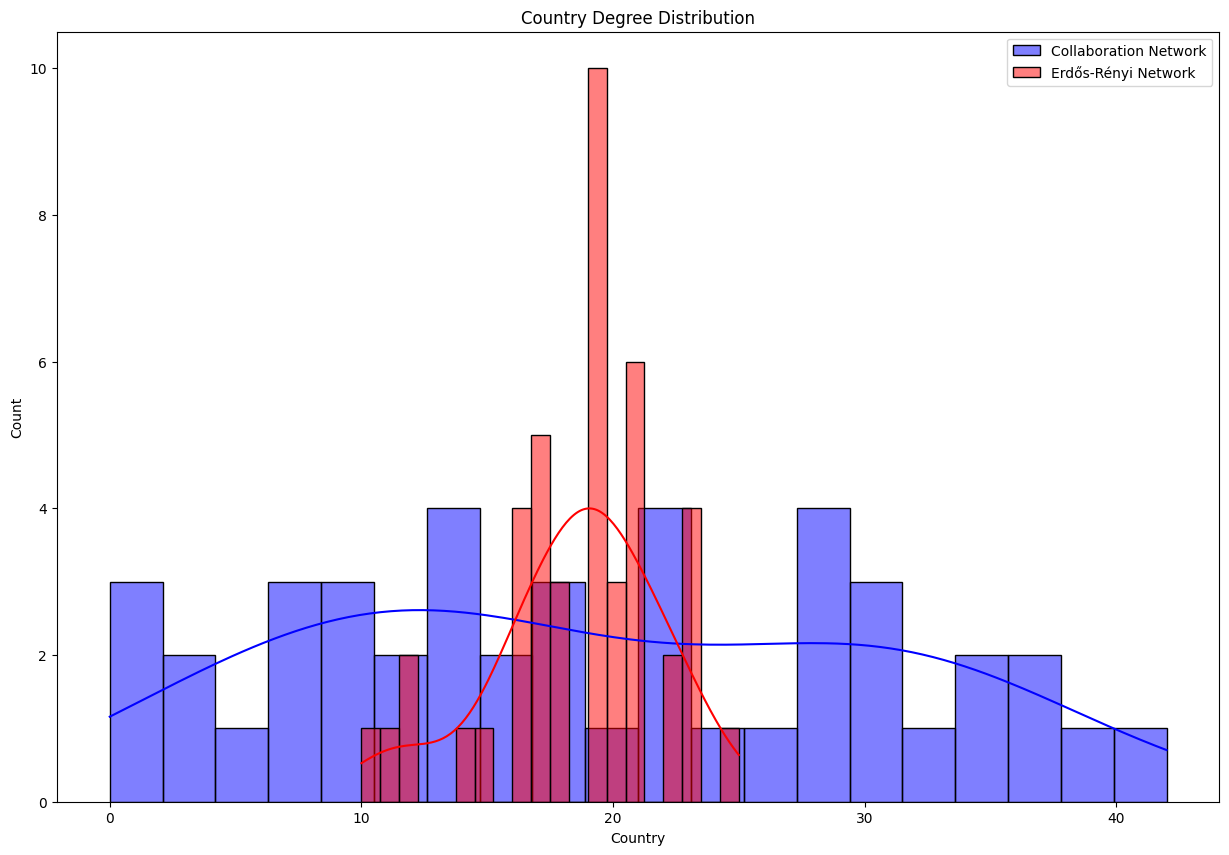

In [35]:
plt.figure(figsize=(15, 10))

# Plot the country distribution of the nodes in the collaboration network of the data scientists
sns.histplot([degree for node, degree in G_countries.degree()], bins=20, kde=True, color='blue',
             label='Collaboration Network')

# Plot the country distribution of the nodes in the Erdős-Rényi random network
sns.histplot([degree for node, degree in random_network_countries.degree()], bins=20, kde=True, color='red',
             label='Erdős-Rényi Network')

plt.title('Country Degree Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend()

# Save the plot as a PNG file in the 'plots' directory
#plt.savefig(plots_dir + 'country_distribution_random_comparison.png', bbox_inches='tight')
plt.show()

As we can see, the degree distribution of the countries in the Erdős-Rényi random network takes smaller range compared to the one of the original collaboration network. This again is because in the random network the nodes are connected more uniformly, while in the real collaboration network we have hubs but also many nodes with low degrees and several isolated ones. Thus, in the random networks, the degrees are closer to each other on average, and we don't have degree values close to the k_min and k_max of the network. This concludes the comparison of the collaboration network of the data scientists with the Erdős-Rényi random network. In the next section, we will transform the network to create a new network based on the rules we defined.